<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/04-regularization/Regularization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Moskvicheva Polina, мИИПИ20-2022

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [38]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:00<00:00, 617.26it/s]


[ 2.49320539 -5.05541239 -1.87562233  3.47577259 -0.0244084 ]


100%|██████████| 100/100 [00:00<00:00, 597.26it/s]


[ 4.13425623 -8.13828283 -3.69299143  6.66782277 -0.04497702]


100%|██████████| 100/100 [00:00<00:00, 594.82it/s]


[ 17.47416009 -32.77454431 -16.69536726  31.14689361  -0.03624373]


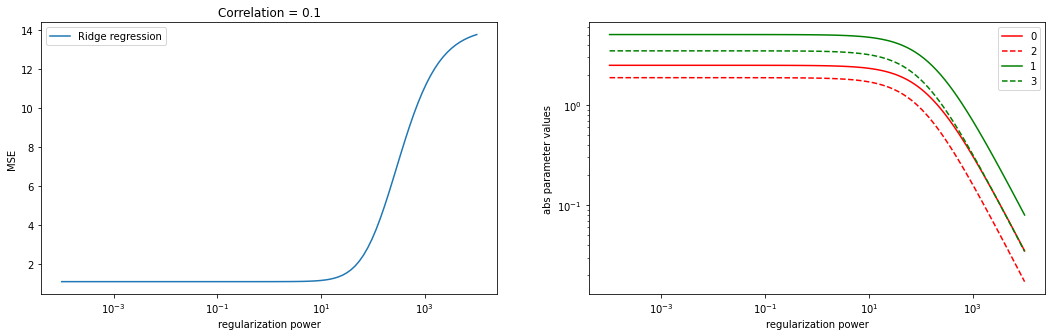

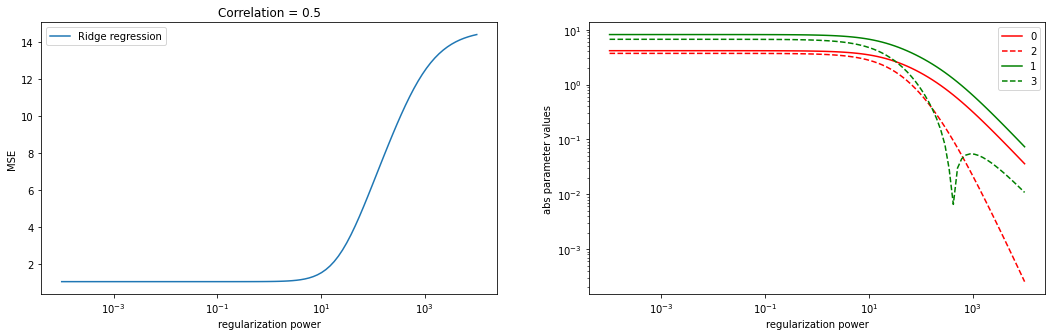

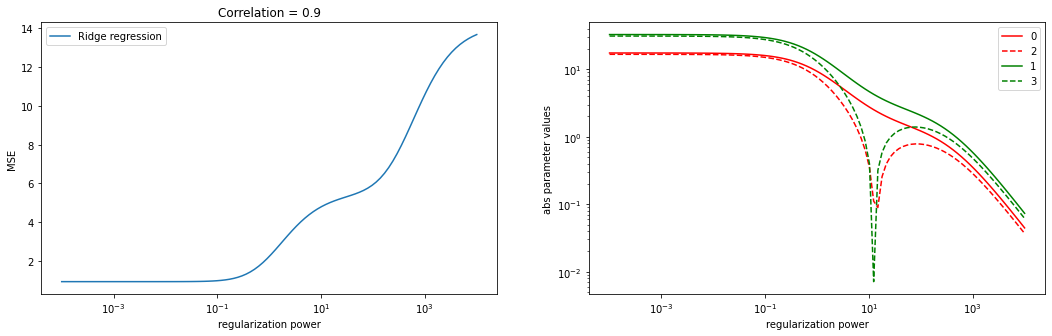

In [54]:
from tqdm import tqdm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
  params_ridge = []
  mse_ridge = []
  
  for alpha in tqdm(alpha_values):
    linear_model = Ridge(alpha=alpha)
    model = make_pipeline(
    
      PolynomialFeatures(1, include_bias=False),
      linear_model
    )
    model.fit(X, y)

    params_ridge.append(
      np.append(linear_model.coef_,
                linear_model.intercept_)
    )

    mse_ridge.append(mean_squared_error(y, model.predict(X)))

  params = np.array(params_ridge)

  # print(params.shape)
  print(params[0,:])

  plt.figure(figsize=(18, 5))

  plt.subplot(1, 2, 1)

  plt.title(f'Correlation = {correlation}')
  plt.plot(alpha_values, mse_ridge, label='Ridge regression')
  plt.ylabel('MSE')
  plt.xlabel('regularization power')
  plt.legend()
  plt.xscale('log')

  plt.subplot(1, 2, 2)
  
  
  plt.plot(alpha_values, np.abs(params[:,0]), color='red', label='0');
  plt.plot(alpha_values, np.abs(params[:,2]), '--', color='red', label='2');
  plt.plot(alpha_values, np.abs(params[:,1]), color='green', label='1');
  plt.plot(alpha_values, np.abs(params[:,3]), '--', color='green', label='3');
  plt.legend()
  plt.xlabel("regularization power")
  plt.ylabel("abs parameter values")
  plt.xscale('log')
  plt.yscale('log')
 

100%|██████████| 100/100 [00:00<00:00, 565.66it/s]


[ 2.32338558 -5.07311376 -1.781366    3.62445163 -0.01029597]


100%|██████████| 100/100 [00:00<00:00, 585.47it/s]


[ 3.99296849 -7.93205893 -3.32342048  6.50836336 -0.02420996]


100%|██████████| 100/100 [00:00<00:00, 500.31it/s]


[ 1.81255009e+01 -3.42707967e+01 -1.74821136e+01  3.28426627e+01
 -6.92295013e-03]


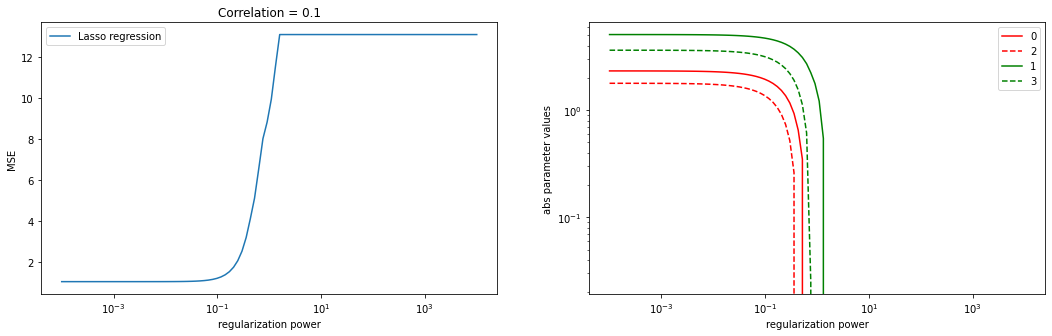

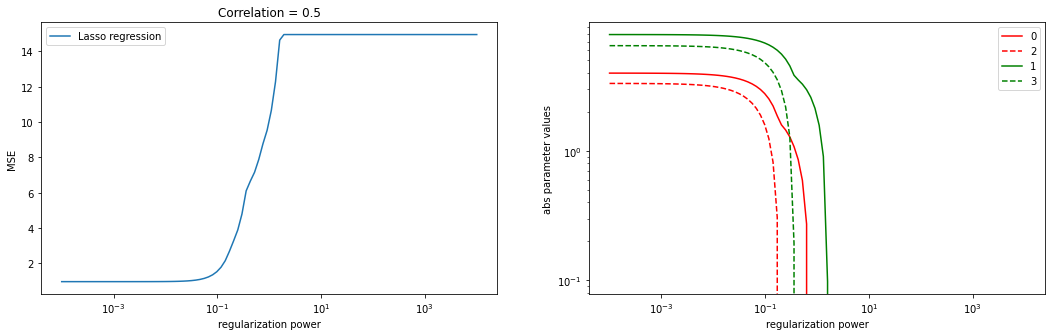

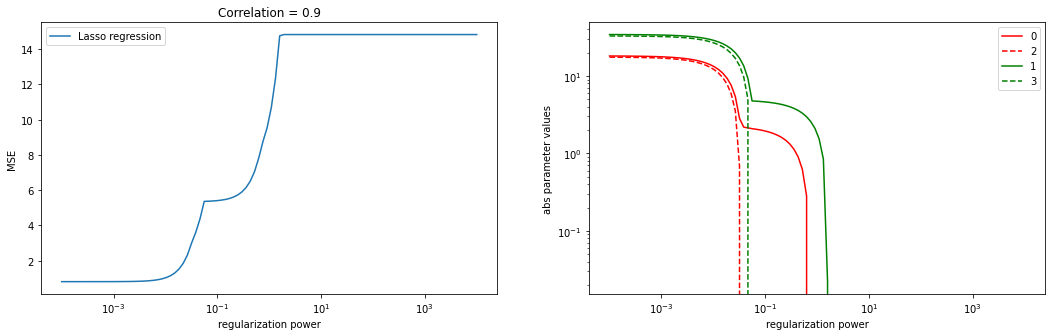

In [56]:

for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
  params_lasso = []
  mse_lasso = []
  
  for alpha in tqdm(alpha_values):
    linear_model = Lasso(alpha=alpha, max_iter=1000000)
    model = make_pipeline(
    
      PolynomialFeatures(1, include_bias=False),
      linear_model
    )
    model.fit(X, y)

    params_lasso.append(
      np.append(linear_model.coef_,
                linear_model.intercept_)
    )

    mse_lasso.append(mean_squared_error(y, model.predict(X)))


  params = np.array(params_lasso)
  print(params[0,:])
  plt.figure(figsize=(18, 5))

  plt.subplot(1, 2, 1)

  plt.title(f'Correlation = {correlation}')
  plt.plot(alpha_values, mse_lasso, label='Lasso regression')
  plt.ylabel('MSE')
  plt.xlabel('regularization power')
  plt.legend()
  plt.xscale('log')

  plt.subplot(1, 2, 2)
  plt.plot(alpha_values, np.abs(params[:,0]), color='red', label='0');
  plt.plot(alpha_values, np.abs(params[:,2]), '--', color='red', label='2');
  plt.plot(alpha_values, np.abs(params[:,1]), color='green', label='1');
  plt.plot(alpha_values, np.abs(params[:,3]), '--', color='green', label='3');
  plt.legend()
  plt.xlabel("regularization power")
  plt.ylabel("abs parameter values")
  plt.xscale('log')
  plt.yscale('log')
 

### $\color{Blue}{\text{We see that the lower the alpha hyperparameter is, the less error we have and the closer by absolute value high-correlated features are}}$

In [57]:
# X = np.arange(6).reshape(3, 2)
# X
# poly = PolynomialFeatures(1, include_bias=False)
# poly.fit_transform(X)
